<a href="https://colab.research.google.com/github/alouwyck/dania-international-days/blob/main/machine_learning/Intro_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

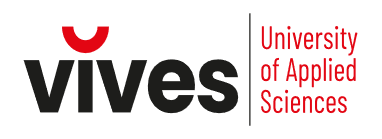<br>

**Dania International Days**<br>
13 - 15 March 2024<br><br>
Workshop by Andy Louwyck

---



---



# **INTRODUCTION TO MACHINE LEARNING**

This notebook is a brief introduction to solving machine learning problems with Python. In particular, some examples of supervised learning are discussed:

- classification with K Nearest Neighbors
- classification with logistic regression
- simple linear regression
- polynomial regression


**Supervised learning** uses labeled data to predict outcomes, while **unsupervised learning** discovers hidden patterns in unlabeled data without human intervention.

## **Python Libraries**

We need the following libraries:
- **NumPy**: library for numerical computation.
- **Pandas**: library for analyzing structured data
- **MatplotLib**: library for visualizing data
- **Scikit-Learn**: machine learning library

We import these libraries using the `import` command. It is customary to give NumPy alias `np` and Pandas alias `pd`. From MatplotLib, we need the `pyplot` module; the convention is to import it as `plt`.

In [1]:
import numpy as np  # numeric python
import pandas as pd  # python data analysis library
import matplotlib.pyplot as plt  # python library for visualizations
plt.rcParams["figure.dpi"] = 80  # set figure dpi

From Scikit-Learn, we import only the classes we use at the time we need them.

## **Structured Data**

In this notebook we will work with structured data only. These are data that are stored in two-dimensional tables, which are found in relational databases, but also in tabular text files such as csv-files. To handle this kind of data, we will use Pandas, a powerful and versatile Python library designed for data manipulation and analysis.

The fundamental data structure in Pandas is a dataframe, which is basically a two-dimensional table. A dataframe can be created using the `DataFrame` constructor:

In [ ]:
data = dict(
    day=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    temperature=[15, 10, 12, 18, 16, 11, 17],  # in degrees Celcius
    rain=[3.1, 0.0, 0.2, 2.1, 1.0, 0.0, np.nan],  # in mm
    wind=['strong', 'mild', 'mild', 'mild', 'strong', 'mild', pd.NA]
)

df = pd.DataFrame(data)
df

,day,temperature,rain,wind
0,Monday,15,3.1,strong
1,Tuesday,10,0.0,mild
2,Wednesday,12,0.2,mild
3,Thursday,18,2.1,mild
4,Friday,16,1.0,strong
5,Saturday,11,0.0,mild
6,Sunday,17,NaN,<NA>


Checking the data type of `df`, we see it is a `DataFrame` indeed:

In [ ]:
type(df)

pandas.core.frame.DataFrame

The `NaN` value stands for "not-a-number" and the `NA` value for "not available". When dealing with large datasets, one may use method `isna` to check if there are missing values:

In [ ]:
np.any(df.isna())  # np.any returns true if at least one element is True

True

By invoking method `describe`, we get the descriptive statistics of the numerical variables:

In [ ]:
df.describe().T  # use .T to transpose the output

,count,mean,std,min,25%,50%,75%,max
temperature,7.0,14.142857,3.132016,10.0,11.50,15.0,16.500,18.0
rain,6.0,1.066667,1.283225,0.0,0.05,0.6,1.825,3.1


We see the `NaN` value is not taken into account. It is also possible to plot these numerical variables:

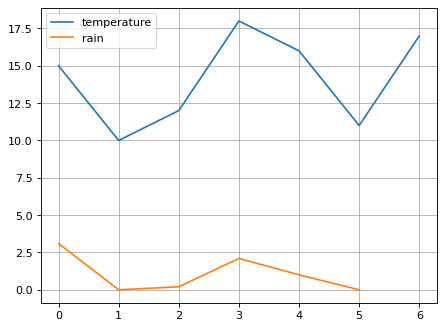

In [ ]:
df.plot();
plt.grid();

Selecting a specific column can be done in two ways:

In [ ]:
print(df.temperature)
print()
print(df['rain'])

0    15
1    10
2    12
3    18
4    16
5    11
6    17
Name: temperature, dtype: int64
0    3.1
1    0.0
2    0.2
3    2.1
4    1.0
5    0.0
6    NaN
Name: rain, dtype: float64


The result of these operations is not a Pandas dataframe, but a Pandas series, which is a 1D data structure:

In [ ]:
type(df.rain)

pandas.core.series.Series

Pandas provides all kind of methods that can be performed on the data. Some examples:

In [ ]:
df.sort_values(by=['rain', 'temperature'])  # sort rows by rain values and then by temperature values

,day,temperature,rain,wind
1,Tuesday,10,0.0,mild
5,Saturday,11,0.0,mild
2,Wednesday,12,0.2,mild
4,Friday,16,1.0,strong
3,Thursday,18,2.1,mild
0,Monday,15,3.1,strong
6,Sunday,17,NaN,<NA>


In [ ]:
df.wind.unique()  # unique values in column wind

array(['strong', 'mild', <NA>], dtype=object)

In [ ]:
df[['temperature', 'rain']].max(axis=0)  # maximum of columns temperature and rain

temperature    18.0
rain            3.1
dtype: float64

In [ ]:
df[['temperature', 'rain']].sum(axis=1)  # sum or rows

0    18.1
1    10.0
2    12.2
3    20.1
4    17.0
5    11.0
6    17.0
dtype: float64

The missing values are not taken into account here, but they may be an issue when applying machine learning models. One strategy is to replace them by the mean, the median or the mode of a variable. Here, we replace the `NaN` value by the mean of the rain values, and the `NA` value by the mode of the wind values, that is the most frequent value. Replacing missing values is straightforward using method `fillna`:

In [ ]:
df['wind'] = df['wind'].fillna(df.wind.mode().iloc[0])  # iloc[0] selects the first element
df['rain'] = df['rain'].fillna(df.rain.mean())
df

,day,temperature,rain,wind
0,Monday,15,3.100000,strong
1,Tuesday,10,0.000000,mild
2,Wednesday,12,0.200000,mild
3,Thursday,18,2.100000,mild
4,Friday,16,1.000000,strong
5,Saturday,11,0.000000,mild
6,Sunday,17,1.066667,mild


Another option is to omit the samples containing missing values, which is easy using method `drop`:

In [ ]:
df = df.drop(index=6)
df

,day,temperature,rain,wind
0,Monday,15,3.1,strong
1,Tuesday,10,0.0,mild
2,Wednesday,12,0.2,mild
3,Thursday,18,2.1,mild
4,Friday,16,1.0,strong
5,Saturday,11,0.0,mild


Using method `drop`, it is also possible to delete a column:

In [ ]:
df = df.drop(columns=['day'])
df

,temperature,rain,wind
0,15,3.1,strong
1,10,0.0,mild
2,12,0.2,mild
3,18,2.1,mild
4,16,1.0,strong
5,11,0.0,mild


As we've seen in previous code examples, the dataframe methods operate on entire columns or rows, although these methods actually apply to individual entries. This is an interesting property of Pandas dataframes: they allow for **vectorized expressions**, which means that the methods perform element-by-element operations without having to use a loop.

Suppose we want to convert the temperature values in our table from degrees Celsius to degrees Fahrenheit using the following formula:

> `°F = °C * 9 / 5 + 32`

To do so, we don't need to loop over the rows, but we can apply the conversion formula directly to the `'temperature'` column:



In [ ]:
df.temperature = df.temperature * 9 / 5 + 32
df

,temperature,rain,wind
0,59.0,3.1,strong
1,50.0,0.0,mild
2,53.6,0.2,mild
3,64.4,2.1,mild
4,60.8,1.0,strong
5,51.8,0.0,mild


Not only they make our code more readable, but in most cases, it is also computationally more efficient to use vectorized operations instead of loops!

So, that concludes our Pandas 101. We're now prepared to apply some well-known machine learning algorithms to structured data!

## **What is Machine Learning?**

Let's first try to understand the difference between traditional programming and classical AI on one hand and machine learning on the other. The following picture clearly summarizes it:

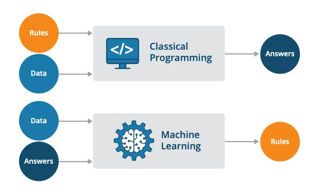

In both cases we have input data. In classical programming and AI, we also know the rules, which is called the **model**. When an **algorithm** applies these rules to the input data, then we get the answers or the output. In machine learning, we don't know the rules. In case of **supervised learning**, however, we know the answers, and the machine learning algorithm will derive the rules from these (input, output) pairs. So, a machine learning algorithm returns a model! That model can be used afterwards like a classical program to **predict** answers on new data.

### Classical Programming

An example to illustrate this. Suppose we have to write a program that controls the thermostat: when the temperature is lower than 17 degrees Celsius, the heating should be on; otherwise, the heating is off. That is very straightforward to implement:

In [ ]:
threshold = 17
temperature = float(input("What is the temperature?\n"))  # data
heating = 'on' if temperature < threshold else 'off'      # rule
print(f'The heating is {heating}!')                       # answer

What is the temperature?
18
The heating is off!


That is a very simple example of traditional programming:
- you get the input data: the temperature
- and the rule: if the given temperature is lower than 17.5, then the heating is on, otherwise it is off.
- so your algorithm is able to calculate the output by applying the rule to the input.

### Machine Learning

In Machine Learning, we do not know the rule, but we get the input and the ouput:

In [ ]:
import pandas as pd
temperature = [17.1, 15.6, 23.1, 19.8, 12.9, 20.3, 14.7, 16.2]  # data (input)
heating = ['off', 'on', 'off', 'off', 'on', 'off', 'on', 'on']  # answers (output)
table = pd.DataFrame(dict(temperature=temperature, heating=heating))
table

,temperature,heating
0,17.1,off
1,15.6,on
2,23.1,off
3,19.8,off
4,12.9,on
5,20.3,off
6,14.7,on
7,16.2,on


Here the challenge is to derive the rule from these (input, output) pairs. Taking a closer look to the table, we see there are two columns: one with the temperature values and one indicating the corresponding state of the heating. So the input is the 'temperature' column and the output is the 'heating' column. In machine learning, the first is called a **feature**, and the second contains the **labels**.

It's always a good idea to visualize the data. Let's define a function to do that:

In [ ]:
def plot_temperature_heating(table):
    '''
    plots heating vs temperature
    table: Pandas DataFrame with columns 'temperature' and 'heating'
    returns: axes
    '''
    _, ax = plt.subplots(1, 1, figsize=(8, 2))
    on = table.heating == 'on'
    off = ~on
    plt.plot(table[on].temperature, np.ones(on.sum()), 'go');
    plt.plot(table[off].temperature, np.zeros(off.sum()), 'ro');
    plt.xlabel('temperature');
    plt.ylabel('heating');
    plt.yticks((0, 1));
    ax.set_yticklabels(('off', 'on'))
    plt.grid();
    return ax

By plotting the data we see it is easy to separate the 'on' and 'off' temperatures:

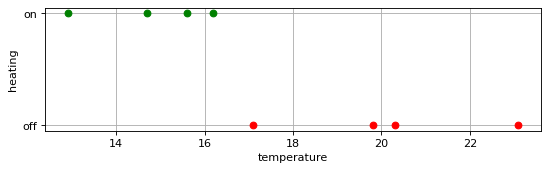

In [ ]:
plot_temperature_heating(table);

### Naive Algorithm

A naive way of separating both classes is defining the threshold as the average of the maximum 'on' temperature and the minimum 'off' temperature:

In [ ]:
max_temperature_on = table[table.heating=='on']['temperature'].max()
min_temperature_off = table[table.heating=='off']['temperature'].min()
threshold = (max_temperature_on + min_temperature_off) / 2
print(f'maximum temperature if heating is on: {max_temperature_on}°C')
print(f'minimum temperature if heating is off: {min_temperature_off}°C')
print(f'threshold is {threshold}°C')

maximum temperature if heating is on: 16.2°C
minimum temperature if heating is off: 17.1°C
threshold is 16.65°C


Let's add the derived threshold to the plot:

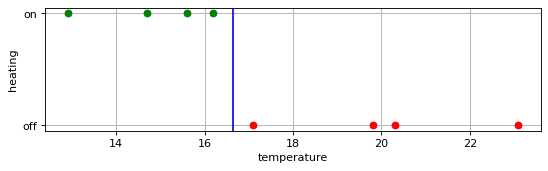

In [ ]:
ax = plot_temperature_heating(table);
yl = ax.get_ylim();
ax.plot(threshold * np.ones(2), [-1, 2], 'b-');
ax.set_ylim(yl);

### Nearest Neighbor

Another way to decide whether the heating is on or off given a new temperature, is to simply adopt the output of the closest temperature, called the **nearest neighbor**, which is found by calculating the absolute difference between the given temperature and the temperatures in the dataset and taking the sample having the smallest absolute difference:

> $\min_i{|T_{new} - T_i|}$

where $T_{new}$ is the given temperature and $T_i$ is the $i$-th temperature in the dataset. This nearest neighbor is easily found using Pandas methods `abs()` and `argmin()`:

In [ ]:
temperature = float(input("What is the temperature?\n"))  # input temperature
abs_difference = (temperature - table.temperature).abs()  # absolute difference
heating = table.heating.iloc[abs_difference.argmin()]     # label of nearest neighbor
print(f'The heating is {heating}!')                       # answer

What is the temperature?
16.5
The heating is on!


When we visualize the new data point given by the user, then we see the closest point from the dataset has label 'on' indeed:

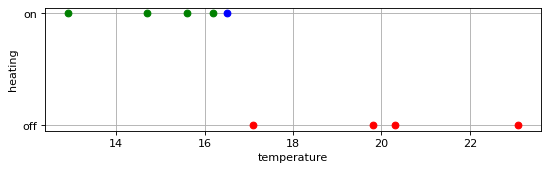

In [ ]:
ax = plot_temperature_heating(table);
ax.plot(temperature, heating == 'on', 'bo');

This is an example of a very simple machine learning model. Actually, it is a special case of a very well-known machine learning algorithm, called **K Nearest Neighbors** (KNN). As the name suggests, this generalized version selects the K nearest neighbors to determine the output of a new sample. Here, we've set K to 1.

## **Classification**

Classification is a type of **supervised learning** used to **predict qualitative variables**, also called categorical variables, by learning a function that maps input features to output **labels**.

In the thermostat dataset, the labels are stored in the 'heating' column. As there are two labels only, 'on' and 'off', it is a **binary classification** problem.

### K Nearest Neighbors

As already mentioned, we may apply the K Nearest Neighbors (KNN) algorithm to solve the thermostat problem. Using class `KNeighborsClassifier` from Scikit-Learn, it is very straightforward to apply this algorithm:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)  # instantiate with K = 3
model.fit(table[['temperature']].values, table.heating=='on')  # fit data

model.predict([[17.0]]).item()  # predict label for new temperature value

True

We first instantiate the class and the resulting object is assigned to variable `model`. Then we fit the data, where the first argument passed to method `fit` are the features, in this case the 'temperature' values, and the second argument are the labels, in this case the 'heating' column. Finally, a prediction is made for a new temperature value by calling method `predict`. Note the use of double brackets as these methods only accept 2D matrices or tables as input!

Let's plot the new data point (17°C) and its predicted label ('on'):

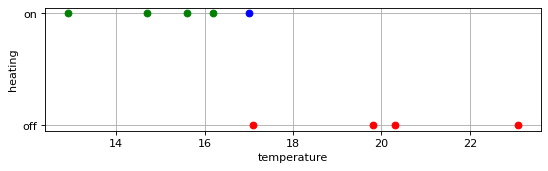

In [ ]:
ax = plot_temperature_heating(table);
ax.plot(17, 1, 'bo');

Two of the closest data points have label 'on' and only one has label 'off'; hence, a given temperature of 17°C is assigned the 'on' label indeed. However, if we would look at the nearest neighbor only (K=1), then the predicted label would be 'off'!

It's important to realize the machine learning model sometimes predicts wrong values! Therefore, it is imperative to always evaluate a machine learning model to assess its performance. Here, we may calculate the **accuracy** which is the number of correct predictions divided by the total number of samples:

In [ ]:
model.score(table[['temperature']].values, table.heating=='on')  # returns accuracy

0.875

We get a score of 87.5%, which means the model predicts the correct label for 7 of the 8 samples in the trainingset.

### Logistic Regression

In our first naive approach to solve the thermostat problem, we derived a threshold from the maximum 'on' temperature and the minimum 'off' temperature. By doing so, we only used two data points. However, a more robust algorithm would use all data points to determine the threshold instead of only two.

An example of such an algorithm is **logistic regression**:

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None)  # instantiate
model.fit(table[['temperature']].values, table.heating=='on')  # fit data

threshold = -model.intercept_.item() / model.coef_.item()  # determine threshold
print(f'threshold is {threshold}°C')

model.predict([[17]]).item()  # predict label for new temperature value

threshold is 16.681991552397978°C


False

Again, the `LogisticRegression` class is instantiated, after which method `fit` is invoked to train the model. The threshold is calculated using the model **parameters**. Finally, the `predict` method is called to get the label for the new temperature value. The accuracy is 100% for this model:

In [ ]:
model.score(table[['temperature']].values, table.heating=='on')  # accuracy

1.0

The model applies a linear transformation to the input feature, in this case temperature $T$:

> $f = aT + b$

Parameters $a$ and $b$ are optimized by the algorithm by minimizing an error function or **loss function**, which quantifies the difference between true and predicted labels. This optimization is the actual **training** of the model. Note that the threshold equals $-b/a$.

The transformed variable $f$ is finally converted to a number between 0 and 1 by applying the **sigmoid** function $\sigma$:

> $p = \sigma(f) = \frac{1}{1+\exp(-f)}$

Variable $p$ may be interpreted as the probability the label is equal to 1, or in this example, the probability that the heating is 'on'. The label is thus found by applying the `round` function to this probability value: if $p >= 0.5$, then the heating is 'on', otherwise it is 'off'.

Let's visualize the derived threshold and the corresponding sigmoid function, which shows us the probability that the heating is on for a given temperature:

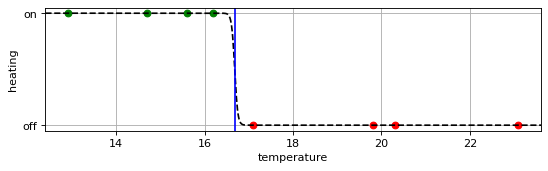

In [ ]:
ax = plot_temperature_heating(table);
sigmoid = lambda f: 1 / (1 + np.exp(-f))
f = lambda x: model.coef_.item() * x + model.intercept_.item()
x = np.linspace(12, 24, 1000)
xl, yl = ax.get_xlim(), ax.get_ylim()
ax.plot(x, sigmoid(f(x)), 'k--');
ax.plot(threshold * np.ones(2), [-1, 2], 'b-');
ax.set_xlim(xl); ax.set_ylim(yl);

We see the logistic regression model separates both classes of data points perfectly indeed!

## **Regression**

Regression is also a type of **supervised learning**, but in this case, it is used to **predict quantitative variables**, such as house prices.

To illustrate how regression works, the `'Student_Marks.csv'` dataset is used. It can be downloaded from [Kaggle](https://www.kaggle.com/datasets/yasserh/student-marks-dataset), a popular online platform for data science and machine learning competitions, collaboration, and learning. The dataset is also used in a [paper](https://www.researchgate.net/publication/367540229_Study_of_the_Association_between_Study_Time_and_Final_Grades) published in the Journal of Education, Humanities and Social Sciences.



In [5]:
df = pd.read_csv('Student_Marks.csv')
df.head()  # show the first 5 records

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


Recall the `describe()` method provides a statistical summary of the DataFrame:

In [6]:
df.describe().T  # T transposes the resulting table

,count,mean,std,min,25%,50%,75%,max
number_courses,100.0,5.29000,1.799523,3.000,4.0000,5.0000,7.00000,8.000
time_study,100.0,4.07714,2.372914,0.096,2.0585,4.0220,6.17925,7.957
Marks,100.0,24.41769,14.326199,5.609,12.6330,20.0595,36.67625,55.299


There are 100 samples and 3 features. Here, we want to predict the students' marks from the time they studied. So `'time_study'` is the independent variable, and `'Marks'` is the dependent variable or **target**.

Let's first make a scatterplot to visualize the relation between these two variables:

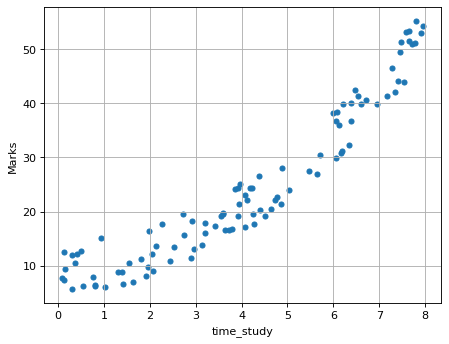

In [7]:
df.plot.scatter(x='time_study', y='Marks');
plt.grid();

We clearly see the marks increase with the study time!

### Simple Linear Regression

Let's assume a **linear relation** between the study time, which we denote by $x$, and the marks, which we denote by $y$. Mathematically, this relation is expressed as follows:

> $y = ax + b$

where $a$ and $b$ are **parameters**. Note that this function expresses a straight line characterized by slope $a$ and intercept $b$. The parameters are derived by minimizing the squared differences between true marks $y$ and predicted marks $\hat{y}$:

> $L = \sum_{i=1}^n (y_i - \hat{y}_i)^2$

with $n$ the number of samples. $L$ is called the **loss function**. It is common to normalize the loss score by dividing it by the number of samples $n$, in which case it is called the **mean squared error** (MSE). Note that the difference between true and predicted value is called the **residual**.

Finding the optimal values for parameters $a$ and $b$ is called **simple linear regression**. It can be performed very easily using Scikit-Learn class `LinearRegression`:

In [8]:
from sklearn.linear_model import LinearRegression

X, y = df[['time_study']].values, df.Marks.values  # feature X, target y

model = LinearRegression()  # instantiate class
model.fit(X, y)  # fit data
model.score(X, y)  # R² score

0.8878423939061949

We get a **R² score** of 0.89 which indicates the fit is relatively good. The coefficient of determination R² is always a value between 0 and 1, and the closer to 1, the better the fit.

Let's add the derived regression line to the scatter plot:

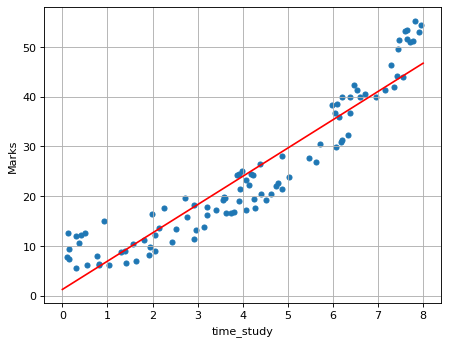

In [9]:
df.plot.scatter(x='time_study', y='Marks');
xline = np.array([[0, 8]]).T  # must be 2D matrix!
yline = model.predict(xline)  # predict regression line
plt.plot(xline, yline, 'r-');
plt.grid();

Note that we created the regression line by predicting the `y`-values for `x = [0, 8]`. And what do we see? Well, the regression line is a good fit indeed. But can we do better?

### Polynomial Regression

Let's try **polynomial regression** which results in a curve that is not a straight line. The relation between $x$ and $y$ is non-linear in this case, and it is expressed by the following polynomial function:

> $y = b + a_1x + a_2x^2 + ... + a_nx^n = b + \sum_{i=1}^{n}a_ix^i$

where parameters $a_i$ and $b$, also called the **coefficients**, are derived again by minimizing an error function. The highest power $n$ is the **degree** of the polynomial. Note that $n=1$ in case of simple linear regression.

We may use the Scikit-Learn's `PolynomialFeatures` class to preprocess feature `X`, but using NumPy function `polyfit()` is more straightforward. Let's try a polynomial of degree 15:

In [11]:
X = X.flatten()               # polyfit wants 1D array!
a = np.polyfit(X, y, deg=15)  # polynomial fit of degree 15

Using function `polyval()` the predictions can be calculated:

In [12]:
from sklearn.metrics import r2_score  # import function to calculate R² score

yp = np.polyval(a, X)          # predictions
r2_score(y_true=y, y_pred=yp)  # R² score

0.9626851117937791

Now we get a R² score of 0.96, which indicates the polynomial fit is significantly better! Let's plot the corresponding regression curve:

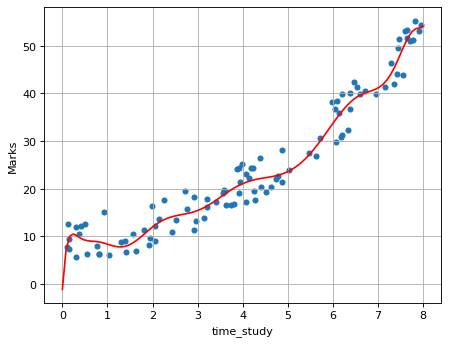

In [13]:
xcurve = np.linspace(0, 8, 100)  # create 100 equally spaced points x between 0 and 8
ycurve = np.polyval(a, xcurve)   # predict y for these 100 points x
df.plot.scatter(x='time_study', y='Marks')
plt.plot(xcurve, ycurve, 'r-');
plt.grid();

Indeed, the polynomial fit captures the irregularities in the dataset better than the linear regression model. However, These irregularities can largely be attributed to **noise** in the data, and we do not want the model to take them into account!

### Underfitting and Overfitting

It's clear the linear regression model resulting in a straight line is too simple to express the relation between the study time and the marks. Actually, it is an example of **underfitting**. However, the polynomial model of degree 15 is too specific, and probably, it will not perform well on new data. This is called **overfitting**.

So how can we find the right model that does not suffer from underfitting nor overfitting? How do we obtain a good balance between **optimization**, which fits the data as best as possible during training, and **generalization**, which assures a good model performance on new data during inference?

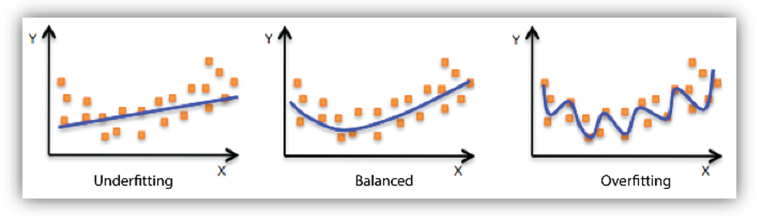

One best practice in machine learning is to reserve a part of the dataset for **validation** only. That implies a given dataset is split into a training set and a validation set, where the first is used to derive the optimal parameter values, and the latter to evaluate the trained model. In case of overfitting, the model will perform very well on the training data yet poorly on the validation data that are not being used to optimize the parameters.

Let's bring that into practice. First we import Scikit-Learn function `train_test_split()`:

In [14]:
from sklearn.model_selection import train_test_split

Now we split the dataset into a training and validation set:

In [18]:
X, y = df[['time_study']].values, df.Marks.values  # feature X, target y
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.4,      # 40% is used for validation
                                                  random_state=2024)  # set random seed

So 60% of the data are used to for training and the remaining 40% for validation. The selection of samples happens randomly. For didactic purposes, we've set the random seed; in practice, it is not recommended to do so. Also notice the use of the term *test* instead of *validate*. The difference between validation and testing will be addressed below.

Let's plot the data points used for training (blue) and validation (red) to see if they are randomly selected indeed:

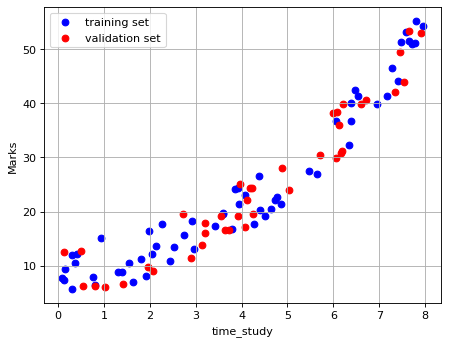

In [19]:
plt.scatter(X_train.flatten(), y_train, color='blue', label='training set');
plt.scatter(X_val.flatten(), y_val, color='red', label='validation set');
plt.legend();
plt.xlabel('time_study');
plt.ylabel('Marks');
plt.grid();

Looks fine! Let's now illustrate how training and validation data are used by applying simple linear regression first, which we've already discussed above:

In [23]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(f"training: {linreg.score(X_train, y_train)}")
print(f"validation: {linreg.score(X_val, y_val)}")

training: 0.890598635859595
validation: 0.8785060860504221


So the *fitting is performed on the training data only*, after which the resulting model is evaluated using both the training and validation data! It is seen the model still performs well: R² score is 0.89 and 0.88, respectively, for the training and the validation set.

How about fitting the data using a polynomial of degree 15, like we did before?

In [25]:
a = np.polyfit(X_train.flatten(), y_train, deg=15)  # polynomial fit of degree 15
print(f"training: {r2_score(y_true=y_train, y_pred=np.polyval(a, X_train.flatten()))}")
print(f"validation: {r2_score(y_true=y_val, y_pred=np.polyval(a, X_val.flatten()))}")

training: 0.9732895781653086
validation: 0.9356553896196032


The model has a score of 0.97 on the training set, but a significantly lower score of 0.93 on the validation set, which indicates there is overfitting indeed.

To find the optimal degree of the polynomial fit, we can loop over a range of degrees, say from 1 to 20, while evaluating each model on both the training and validation set. The evaluation **metric** we will use here is the **mean absolute error** (MAE), which is defined in a very similar way as the MSE, except it considers the absolute value of the residuals instead of the square:

> $MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|$

The MAE has the advantage that it is has the same unit as the target.

In [21]:
from sklearn.metrics import mean_absolute_error as MAE  # import MAE function

mae_train = []  # list of MAEs of training data
mae_val = []    # list of MAEs of validation data
coef = []       # list of coefficients
degrees = range(1, 21)  # range of degrees of polynomial function

for degree in degrees:  # loop through degrees

    a = np.polyfit(X_train.flatten(), y_train, degree)  # polynomial fit of training data
    yp_train = np.polyval(a, X_train.flatten())         # predictions of training data
    yp_val = np.polyval(a, X_val.flatten())             # predictions of validation data

    coef.append(a)  # coefficients
    mae_train.append(MAE(y_true=y_train, y_pred=yp_train))  # MAE of training data
    mae_val.append(MAE(y_true=y_val, y_pred=yp_val))        # MAE of validation data

<ipython-input-21-9ec61abae9e1>:10: RankWarning: Polyfit may be poorly conditioned
  a = np.polyfit(X_train.flatten(), y_train, degree)  # polynomial fit of training data
<ipython-input-21-9ec61abae9e1>:10: RankWarning: Polyfit may be poorly conditioned
  a = np.polyfit(X_train.flatten(), y_train, degree)  # polynomial fit of training data


Let's plot the result using a Matplotlib animation:

In [22]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

# initialization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # figure containing 2 axes
ax1.plot(X_train.flatten(), y_train, 'b.', label='training set');
ax1.plot(X_val.flatten(), y_val, 'r.', label='validation set');
ax1.legend();
xplot = np.linspace(0, 8, 1000)
regression_line = ax1.plot(xplot, np.polyval(coef[0], xplot),'k-')
ax1.set_title('degree = 1');
ax1.set_xlabel('time_study');
ax1.set_ylabel('Marks');
ax1.grid();
ax2.yaxis.set_label_position("right");
ax2.yaxis.tick_right();
mae_train_line = ax2.plot(degrees[0], mae_train[0], 'b.-', label='training');
mae_val_line = ax2.plot(degrees[0], mae_val[0], 'r.-', label='validation');
ax2.legend();
ax2.set_xlabel('Degree');
ax2.set_ylabel('MAE');
ax2.set_xlim((0, 21));
ax2.set_ylim((1, 5));
ax2.grid();

# update function for animation
def update(degree):
    yplot = np.polyval(coef[degree-1], xplot)
    regression_line[0].set_ydata(yplot)
    ax1.set_title('degree = ' + str(degree));
    mae_train_line[0].set_xdata(degrees[:degree])
    mae_train_line[0].set_ydata(mae_train[:degree])
    mae_val_line[0].set_xdata(degrees[:degree])
    mae_val_line[0].set_ydata(mae_val[:degree])

# create animation
ani = FuncAnimation(fig, update, frames=degrees, blit=False, repeat=True)
plt.close()
ani

The left plot displays the dataset along with the resulting regression curve, while the right plot illustrates the Mean Absolute Error (MAE) for both training and validation as a function of the polynomial degree. This right plot is commonly referred to as the **model complexity graph**. It quantifies the error in relation to the model's complexity, which primarily depends on the number of parameters. In other words, the more parameters, the more complex the model becomes. Here, the number of model parameters corresponds to the polynomial degree plus one. The degree itself is considered a **hyperparameter**, as it is set by the user rather than derived by the machine learning algorithm.

Upon closer examination of the model complexity graph, we observe that the blue curve (representing training MAE) consistently decreases with increasing degree. However, the red curve (indicating validation MAE) initially decreases but starts rising again beyond degree 3. This behavior suggests that overfitting occurs for degrees higher than 2, implying that the optimal degree for this model is 2! So we finally fit the complete dataset using a polynomial fit of degree 2 and evaluate this final model:

In [26]:
a = np.polyfit(X.flatten(), y, deg=2)
yp = np.polyval(a, X.flatten())
MAE(y_true=y, y_pred=yp)

2.5925974596318717

We achieve a mean difference of 2.59 between the true and predicted marks when estimating students' performance based on the hours they have studied. Let's plot the resulting regression curve:

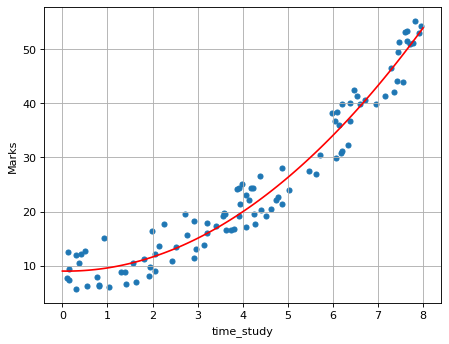

In [27]:
df.plot.scatter(x='time_study', y='Marks');
xplot = np.linspace(0, 8, 100)
plt.plot(xplot, np.polyval(a, xplot), 'r-');
plt.grid();

The red polynomial function of degree 2 is a better fit than the best fitting straight line obtained from linear regression. On the other hand, it appears to be less affected by irregularities in the data than a high-degree polynomial fit is affected. In conclusion, it captures well the general relationship between students' study time and marks!

It is common practice to create a third dataset, the **test set**, which is used to evaluate the final model. While some hyperparameters are fine-tuned using the validation set, information may still leak from this set into the model. The test set remains free from any such information leaks, providing an excellent means to evaluate the model's performance on completely new data. Only when this final evaluation using the test set yields positive results can the model be confidently deployed.

### Regularization

Instead of looping over a range of degrees, we may apply a mathematical trick called regularization. In general, **regularization in machine learning** is a set of techniques used to reduce overfitting by penalizing model coefficients. It is beyond the scope of this workshop to delve into the mathematical details.

However, as an example, **LASSO regression** is applied here that yields a regression curve which is very similar to the second degree polynomial curve derived in previous section. Although we have defined a polynomial of degree 10, the regularization reduced the model's complexity by setting some of the coefficients to zero or values close to zero. The resulting MAE equals 2.66, which is very close to the 2.59 score of the second degree polynomial fit.

In [32]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 10

lasso = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    Lasso(alpha=0.1, tol=0.1)
)
lasso.fit(X, y);

MAE(y_true=y, y_pred=lasso.predict(X))

2.66128937113024

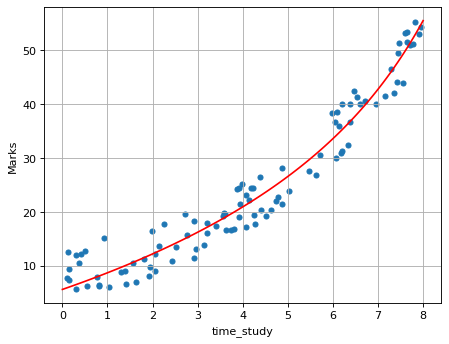

In [31]:
df.plot.scatter(x='time_study', y='Marks');
xplot = np.linspace(0, 8, 100).reshape(-1, 1)
plt.plot(xplot, lasso.predict(xplot), 'r-');
plt.grid();

## **Exercise**

Read the `'Students_Passed.csv'` dataset and try to predict as accurate as possible whether or not students will pass the exam based on the hours they have studied.

Answer the following questions:

- Is this a regression or classification problem? Why?
- Which is the independent variable and which is the target?
- What algorithms discussed in this notebook may be applied to solve the problem?
- How can we compare different models? How do we select the best model?
- Do we get a better model when we also include the number of courses followed by the students?
- What is a confusion matrix? Create one to evaluate the final model you've selected!

Although it is good practice to split the dataset, it is not required for this exercise.


## **References**

- Serrano, L.G., 2021. [Grokking Machine Learning](https://www.manning.com/books/grokking-machine-learning). Manning Publication.
- Chollet, F., 2022. [Deep Learning with Python (2nd ed.)](https://www.manning.com/books/deep-learning-with-python-second-edition). Manning Publication.
- Kasturi, S.N., 2019. [Underfitting and overfitting in machine learning and how to deal with it](https://towardsdatascience.com/underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6fe4a8a49dbf). Towards Data Science.
- [Scikit-Learn User Guide](https://scikit-learn.org/stable/user_guide.html). Consulted on Februari 18, 2024.

---